#a) Proszę wczytać przykładowy obraz lab5_1.jpg i skonwertować go do obrazu w skali szarości.

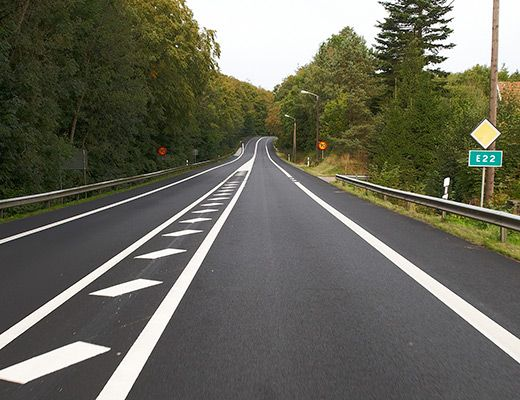

In [2]:
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread("/content/drive/MyDrive/AiPO/lab5_1.jpg")
cv2_imshow(image)

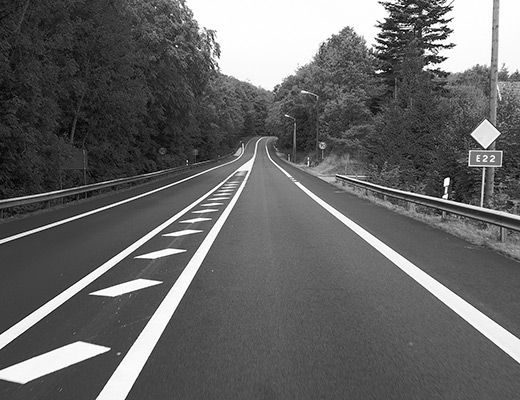

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

#b) Proszę sprawdzić i porównać wynik wykrywania krawędzi metodami
#a. Laplace
#b. Canny
#dla obrazu oryginalnego i obrazu z nałożonym filtrem gaussowskim (5x5). Wynikowy obraz można poddać progowaniu. 

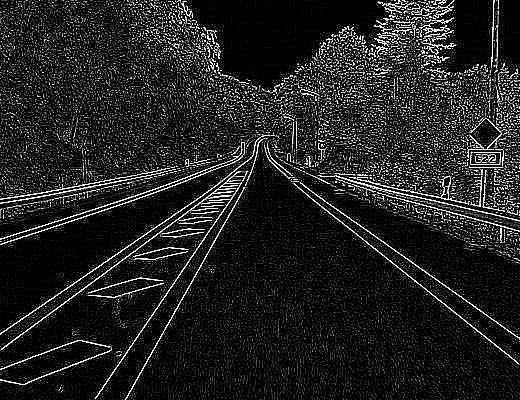

In [ ]:
lap = cv2.Laplacian(gray, cv2.CV_16S, ksize=3)
cv2_imshow(lap)

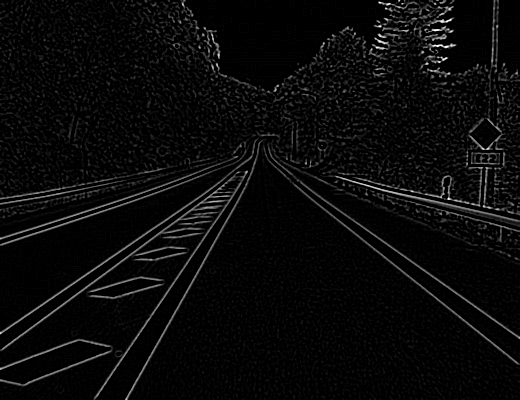

In [ ]:
gauss = cv2.GaussianBlur(gray,(5,5),0)
lap2 = cv2.Laplacian(gauss, cv2.CV_16S, ksize=3)
cv2_imshow(lap2)

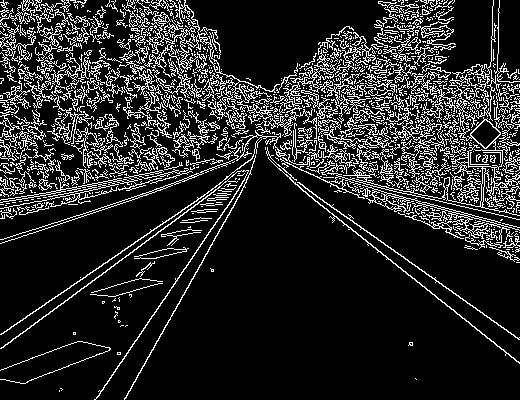

In [ ]:
can = cv2.Canny(gray,50,150)
cv2_imshow(can)

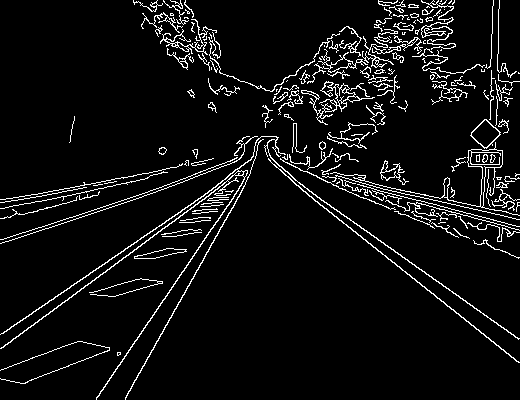

In [ ]:
can2 = cv2.Canny(gauss,50,150)
cv2_imshow(can2)

Metoda Canny jest bardziej odporna na szumy oraz działa lepiej w przypadku krawędzi o niskim kontraście. Dodatkowo daje lepsze wyniki krawędziowe i umożliwia identyfikowanie krawędzi o różnej grubości. Nałożenie filtra na obraz sprawiło, że wykrywane są tylko wyraźne krawędzie i poprawiło wyniki w przypadku obu metod. Mimo wszystko, wciąż lepsze wyniki daje metoda Canny.

#c) Proszę zbadać wpływ parametrów minVal, maxVal i kSize (nie ma w Canny) na wynik działania algorytmu Canny.

3 50 150


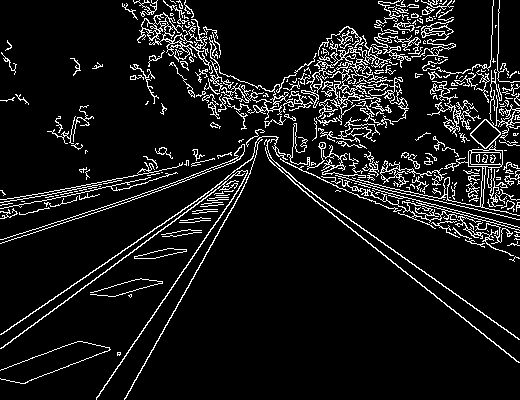

3 50 200


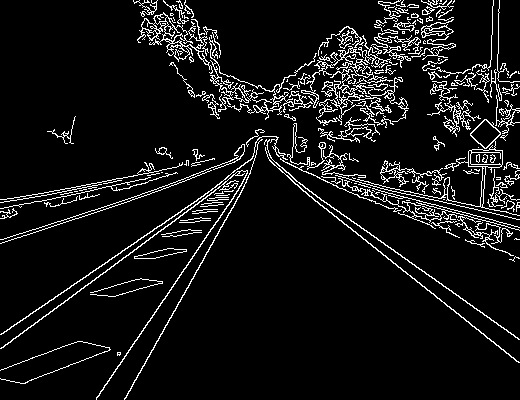

3 50 250


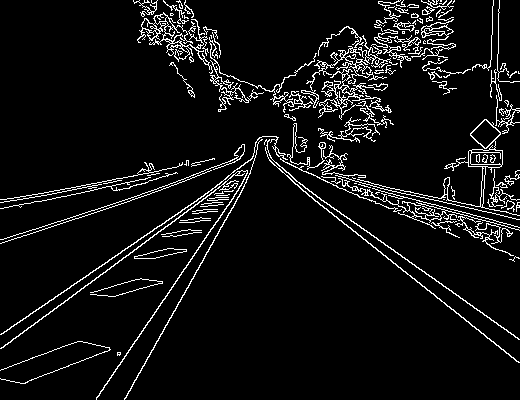

3 100 150


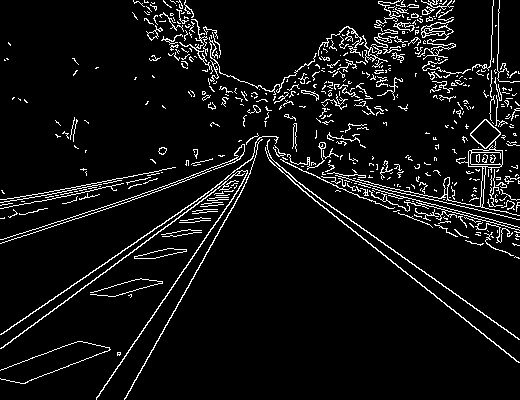

3 100 200


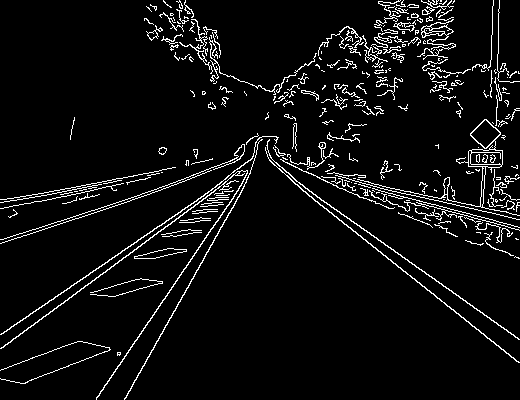

3 100 250


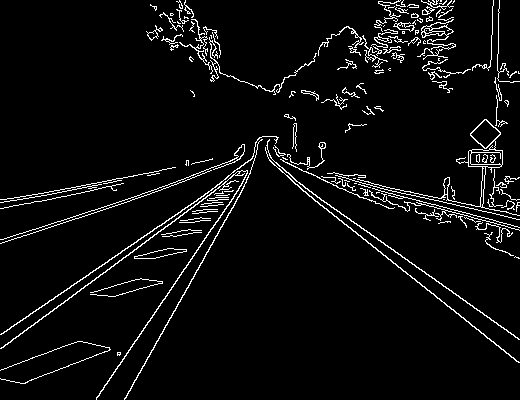

3 150 150


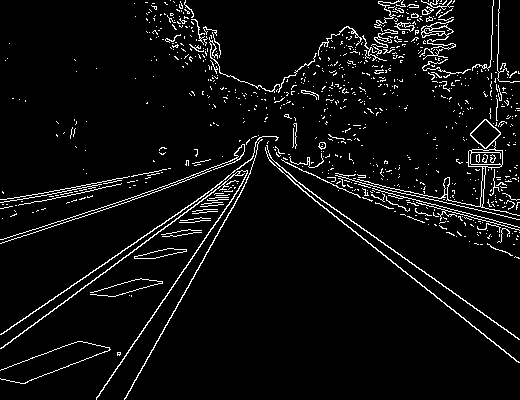

3 150 200


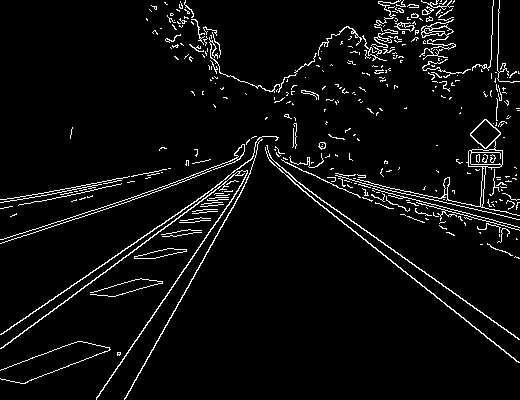

3 150 250


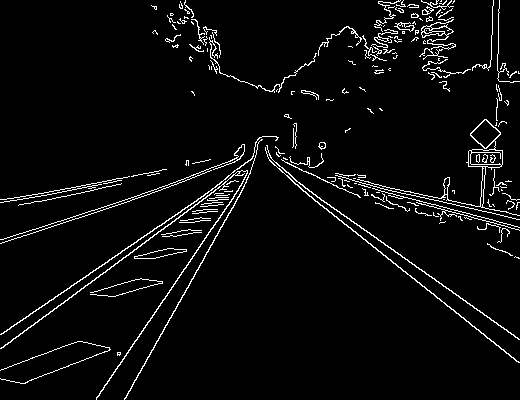

5 50 150


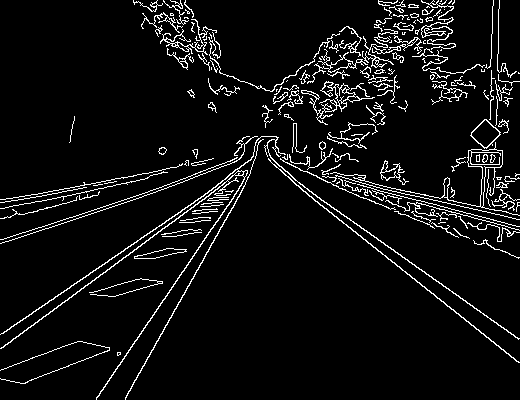

5 50 200


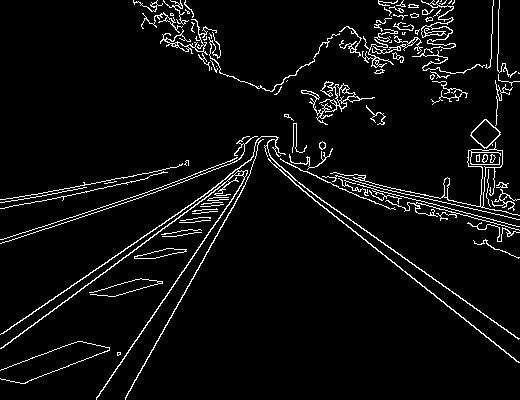

5 50 250


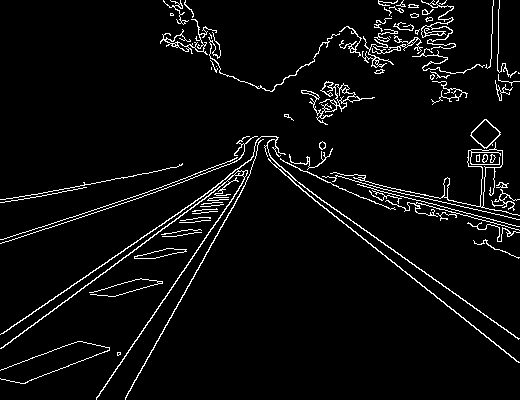

5 100 150


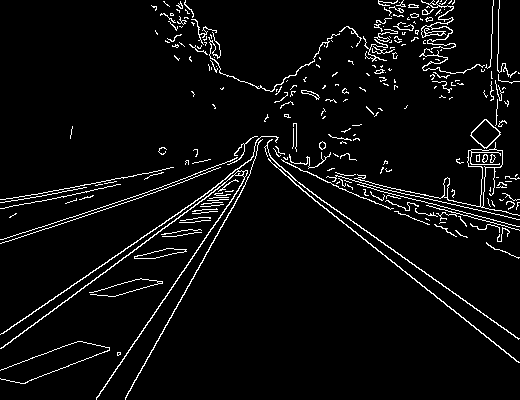

5 100 200


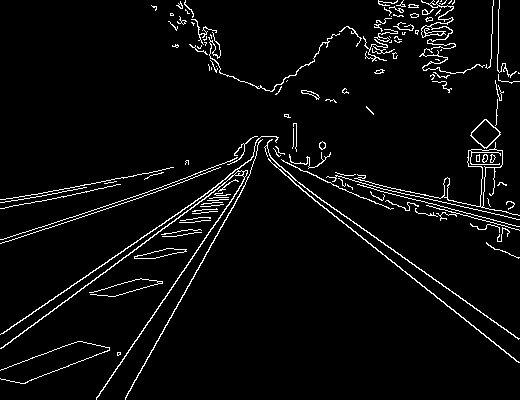

5 100 250


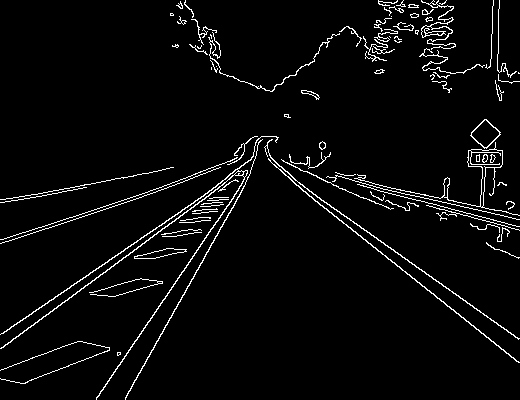

5 150 150


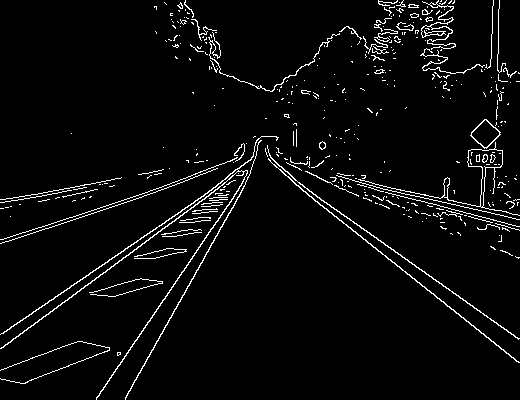

5 150 200


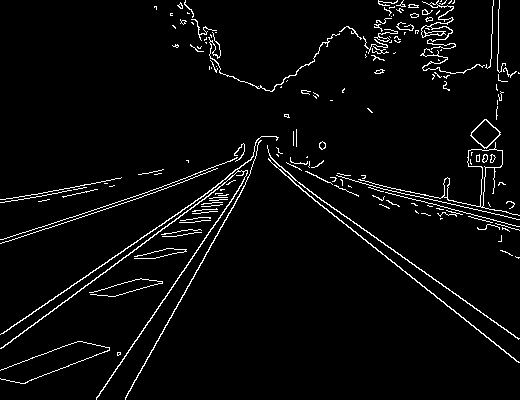

5 150 250


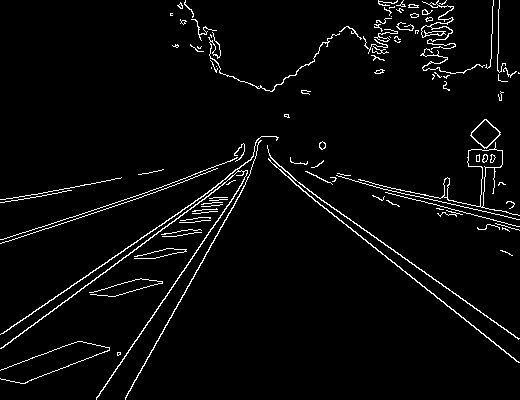

7 50 150


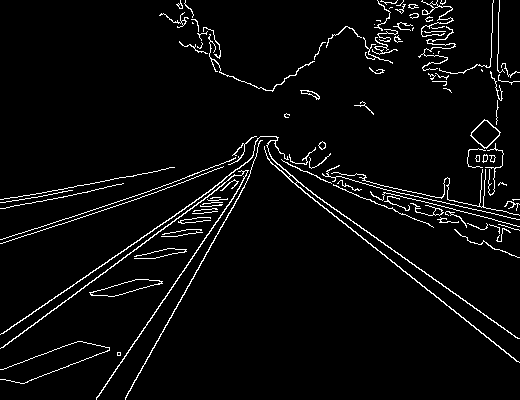

7 50 200


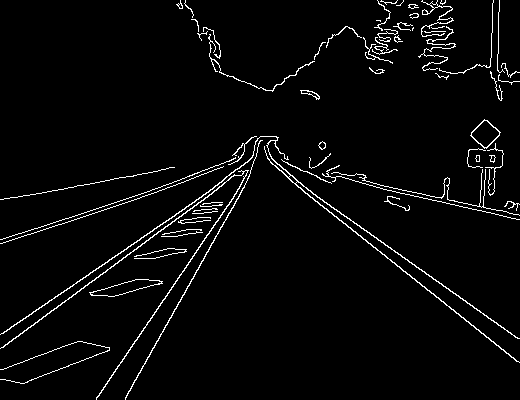

7 50 250


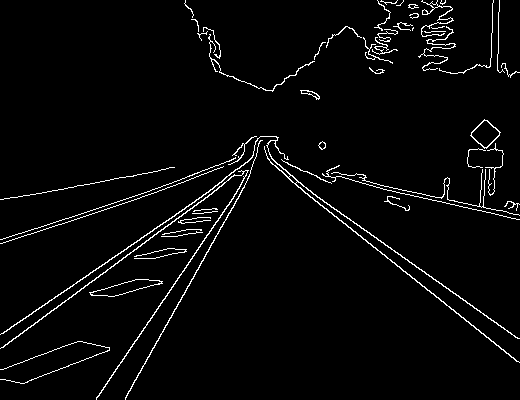

7 100 150


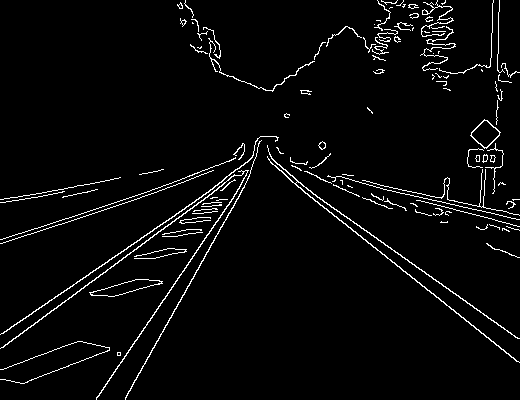

7 100 200


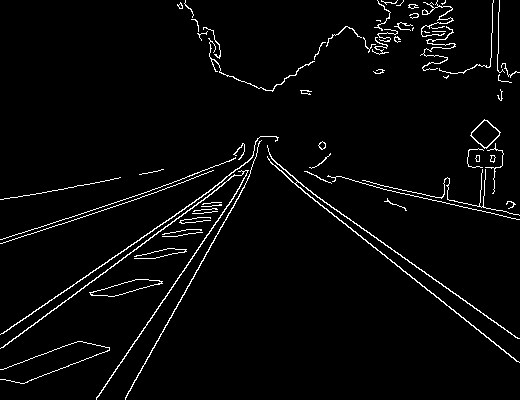

7 100 250


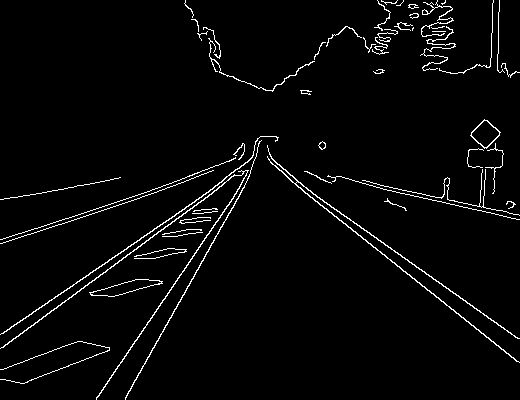

7 150 150


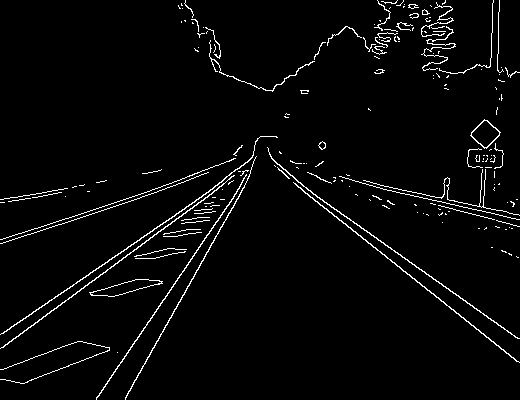

7 150 200


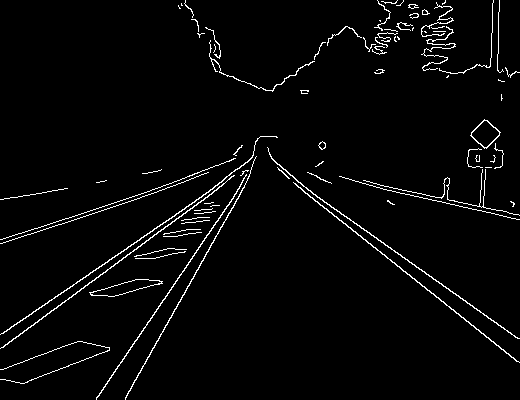

7 150 250


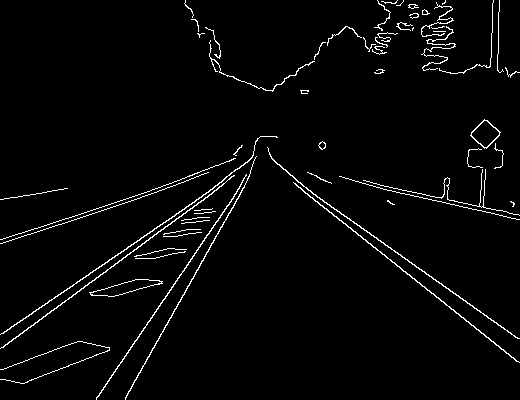

9 50 150


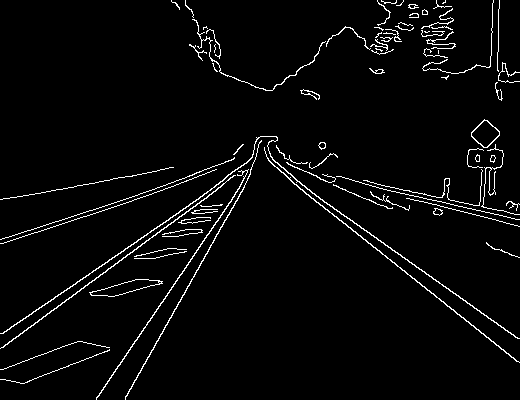

9 50 200


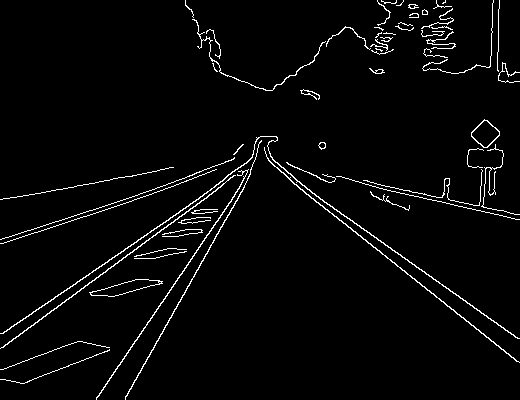

9 50 250


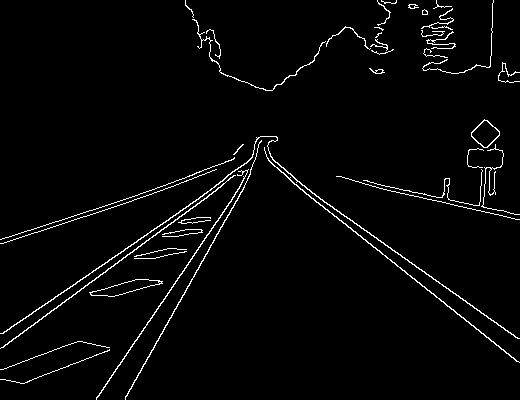

9 100 150


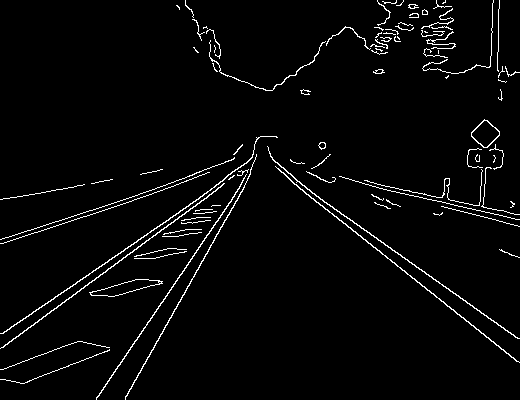

9 100 200


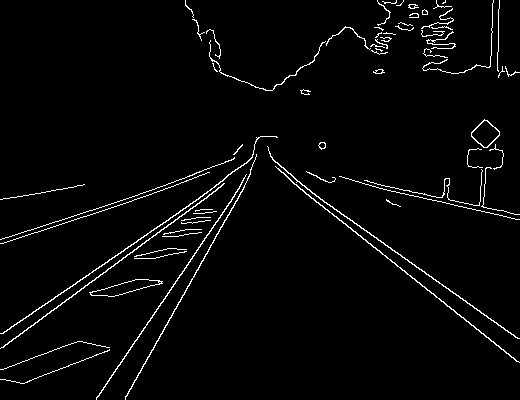

9 100 250


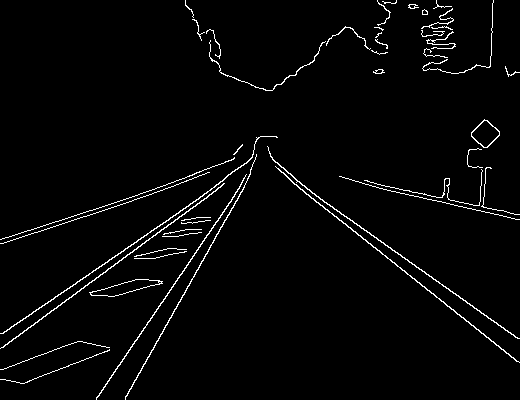

9 150 150


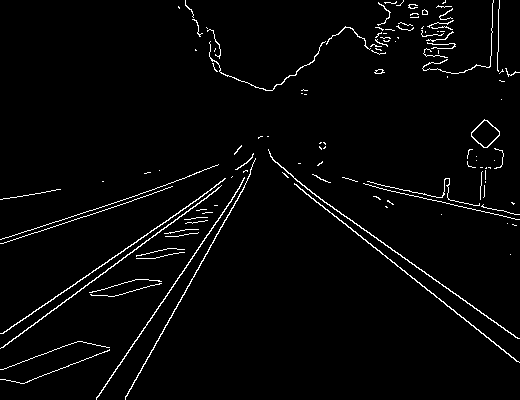

9 150 200


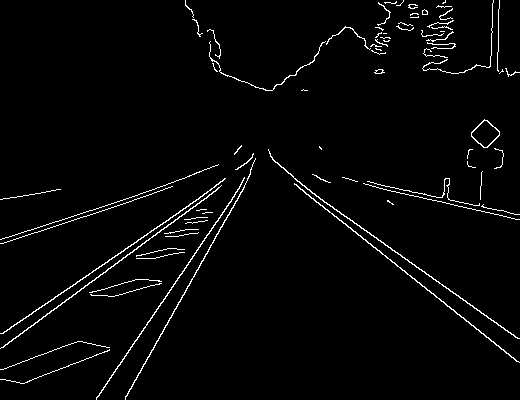

9 150 250


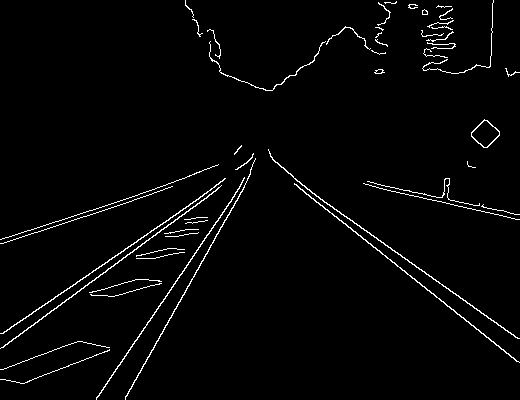

In [ ]:
for i, val1 in enumerate([3,5,7,9]):
  for j, val2 in enumerate([50,100,150]):
    for k, val3 in enumerate([150,200,250]):
      print(val1, val2, val3)
      gauss = cv2.GaussianBlur(gray,(val1,val1),0)
      can = cv2.Canny(gauss,val2,val3)
      cv2_imshow(can)


Parametry minVal i maxVal odpowiadają za dolny i górny próg przy wykonywaniu progowania krawędzi. Piksele o intensywności poniżej dolnego progu są odrzucane jako niebędące częścią krawędzi, podczas gdy piksele o intensywności powyżej górnego progu są uznawane za część krawędzi. Piksele o intensywności pomiędzy progami są uznawane za część krawędzi, gdy są połączone z pikselamim które zostały już oznaczone jako krawędź.

Zbyt niskie wartości progów mogą prowadzić do wykrywania szumu jako krawędzi, natomiast zbyt wysokie wartości mogą prowadzić do pomijania niektórych krawędzi.

#d) Proszę dokonać wykrywania linii metodą transformacji Hough 

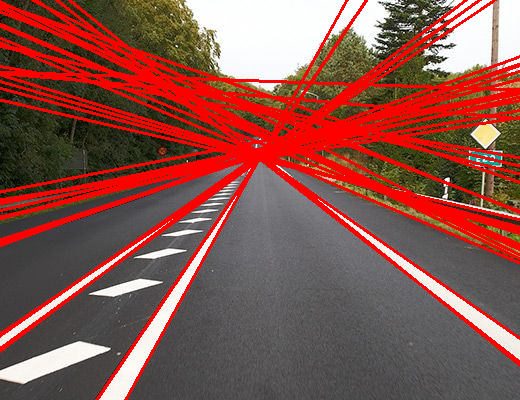

In [ ]:
import numpy as np
image = cv2.imread("/content/drive/MyDrive/AiPO/lab5_1.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)
for r_theta in lines:
    arr = np.array(r_theta[0], dtype=np.float64)
    r, theta = arr
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*r
    y0 = b*r
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

cv2_imshow(image)

# e) Proszę zbadać wpływ progu na wynik działania transformacji Hough

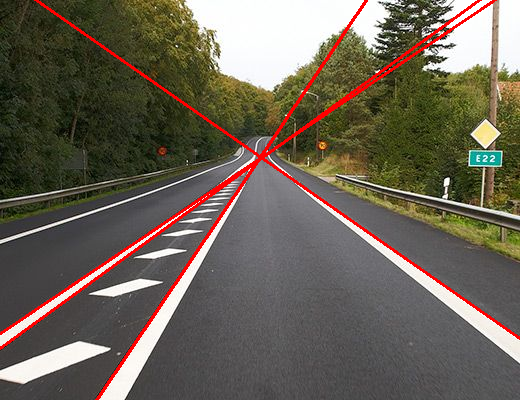

In [ ]:
import numpy as np
image = cv2.imread("/content/drive/MyDrive/AiPO/lab5_1.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
lines = cv2.HoughLines(edges, 1, np.pi/180, 250)
for r_theta in lines:
    arr = np.array(r_theta[0], dtype=np.float64)
    r, theta = arr
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*r
    y0 = b*r
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

cv2_imshow(image)

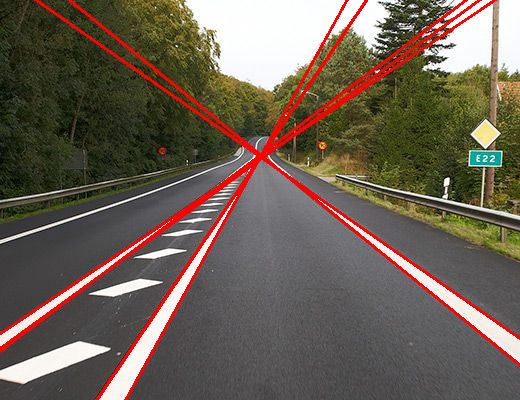

In [ ]:
import numpy as np
image = cv2.imread("/content/drive/MyDrive/AiPO/lab5_1.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
lines = cv2.HoughLines(edges, 1, np.pi/180, 235)
for r_theta in lines:
    arr = np.array(r_theta[0], dtype=np.float64)
    r, theta = arr
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*r
    y0 = b*r
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

cv2_imshow(image)

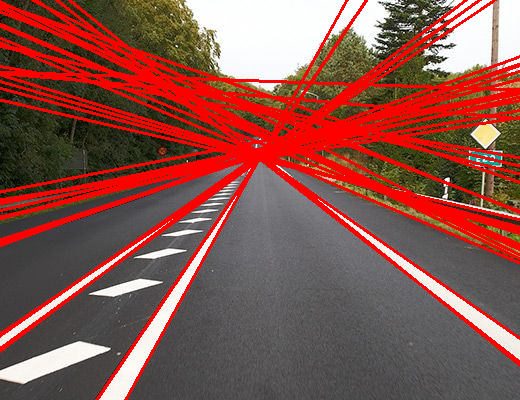

In [ ]:
import numpy as np
image = cv2.imread("/content/drive/MyDrive/AiPO/lab5_1.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)
for r_theta in lines:
    arr = np.array(r_theta[0], dtype=np.float64)
    r, theta = arr
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*r
    y0 = b*r
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

cv2_imshow(image)

Zmniejszenie wartości progu powoduje, że algorytm wykrywa coraz większą ilość krawędzi, przy mniejszych wartościach często wykrywa je błędnie. Gdy próg jest zaś zbyt wysoki, większość linii zostaje pominiętych.

#f) Proszę wczytać drugi z przykładowych obrazów lab5_2.png, podobnie go skonwertować i dokonać wykrywania okręgów

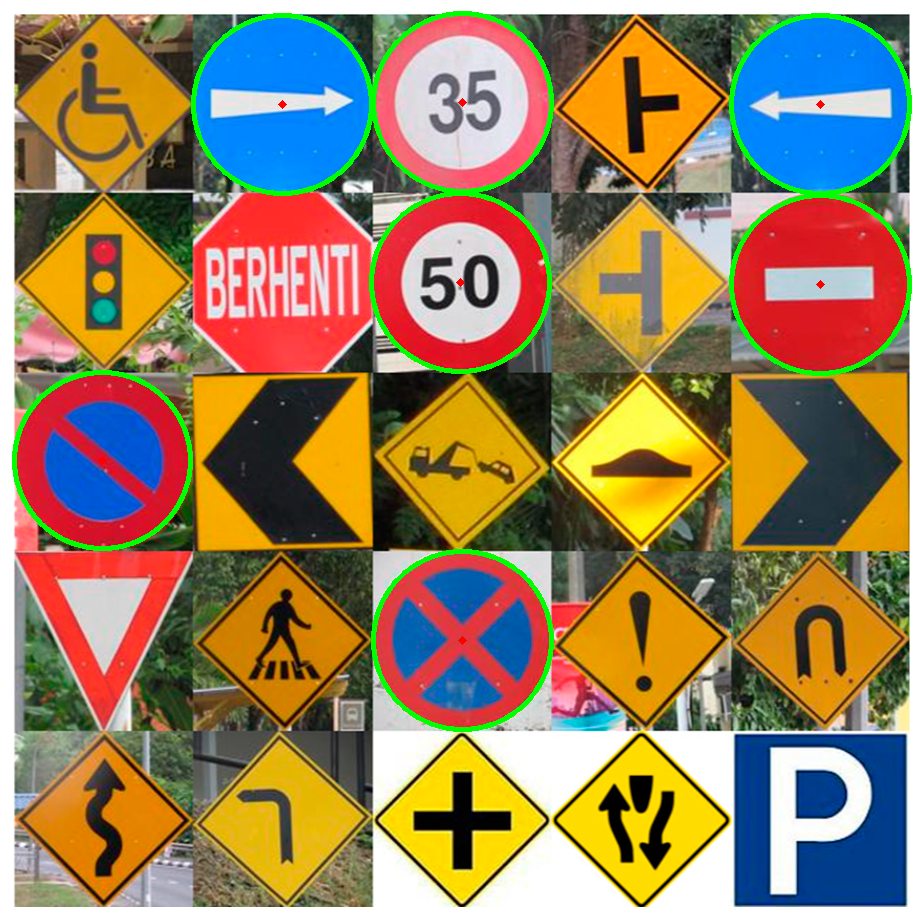

In [11]:
import numpy as np
image = cv2.imread("/content/drive/MyDrive/AiPO/lab5_2.png")
image = cv2.resize(image, dsize = None, fx = 0.5, fy = 0.5, interpolation = cv2.INTER_NEAREST)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_copy = image.copy()

gauss = cv2.GaussianBlur(gray, (5, 5), 0, )

circles = cv2.HoughCircles(gauss, method = cv2.HOUGH_GRADIENT, dp = 1, 
                           minDist = 80, param1 = 60, param2 = 21, minRadius = 85, maxRadius = 90)

circles = np.uint16(np.around(circles))

for circle in circles[0,:]:
    cv2.circle(image_copy, center = (circle[0], circle[1]), radius = circle[2],
		             color = (0, 255, 0),thickness = 4)
    cv2.circle(image_copy, center = (circle[0], circle[1]), radius = 2, 
		             color = (0, 0, 255), thickness = 3)
cv2_imshow(image_copy)
    